### Q4 - Spike-triggered Average (STA)

In [10]:
import os
import numpy as np
from poisson import coefficient_of_variation
from load import load_data, generate_spiking_times
import matplotlib.pyplot as plt

In [92]:
file_path = os.getenv('ABS_PATH') + "/rho.dat"
spikes = load_data(file_path, int)
print("Lenght of data:",len(spikes))
print("Firing Events:", np.sum(spikes))
print(spikes[:18])

Lenght of data: 600000
Firing Events: 53601
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1]


In [93]:
file_path = os.getenv('ABS_PATH') + "/stim.dat"
stimuli = load_data(file_path, float)
print("Lenght of data:",len(stimuli))
print(stimuli[0:12])

Lenght of data: 600000
[-111.9482421875, -81.806640625, 10.2197265625, 83.3642578125, 69.375, 2.6611328125, -25.91796875, -32.24609375, -27.294921875, -20.244140625, -32.216796875, -8.6181640625]


In [138]:
def sta(spikes, stimuli, tau):
    s = 0
    train_length = len(spikes)
    for i, spike in enumerate(spikes):
        if spike and i >= abs(tau):
            s += stimuli[i + tau]
    return s / train_length

In [139]:
stas = []
event_intervals = range(-50,0)
for tau in event_intervals:
    stas.append(sta(spikes, stimuli, tau))
print(len(stas))

50


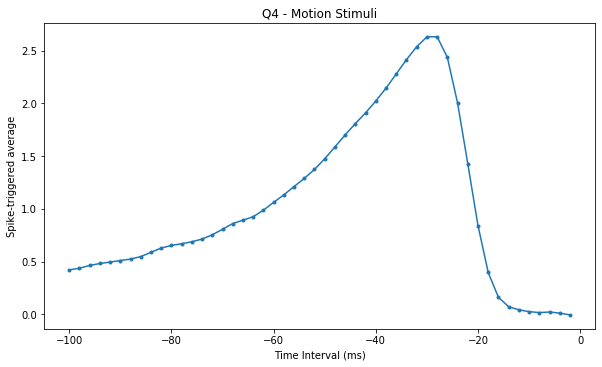

In [140]:
def plot_spike_triggered_avg(stas, title, output_file):
    x = range(-100,0,2)
    fig = plt.figure(figsize=(9,5))
    ax = fig.add_axes([0.1,0.1,0.85,0.85])
    ax.plot(x, stas, linestyle='-', marker='.')

    plt.ylabel("Spike-triggered average")
    plt.xlabel("Time Interval (ms)")
    plt.title(title)
    plt.show()
    fig.savefig(output_file, dpi=fig.dpi)
    
plot_spike_triggered_avg(stas, "Q4 - Motion Stimuli", "spike-triggered-avg.png")

#### COMSM2127

#### Not Adjacent

In [141]:
def sta_pair(spikes, stimuli, tau, pair_window):
    s = 0
    train_length = len(spikes)
    for i, spike in enumerate(spikes):
        pair_i = i + pair_window
        if spike and i >= abs(tau) and pair_i < train_length and spikes[pair_i]:
#             print("Pair", i, pair_i)
            s += stimuli[i + tau] + stimuli[pair_i + tau]
    return s / train_length

In [142]:
# pair_window = 1  ms 2
# pair_window = 5  ms 10
# pair_window = 10 ms 20
# pair_window = 25 ms 50

def calculate_pair_stas(spikes, stimuli, ms):
    pair_window = int(ms/2)
    stas_pair = []
    event_intervals = range(-50,0)
    for tau in event_intervals:
        stas_pair.append(sta_pair(spikes, stimuli, tau, pair_window))
    return stas_pair

In [189]:
def plot_spike_triggered_avg(normal, adj, title, output_file):
    x = range(-100,0,2)
    fig = plt.figure(figsize=(9,5))
    ax = fig.add_axes([0.1,0.1,0.85,0.85])
    ax.plot(x, normal, linestyle='-', marker='.', label='Normal')
    ax.plot(x, adj, linestyle='-', marker='.', label='Adjacent')

    plt.ylabel("Spike-triggered average")
    plt.xlabel("Time Interval (ms)")
    plt.title(title)
    plt.legend()
    plt.show()
    fig.savefig(output_file, dpi=fig.dpi)

#### Adjacent


In [178]:
def sta_pair_adj(spikes, stimuli, tau, pair_window):
    s = 0
    train_length = len(spikes)
    for i, spike in enumerate(spikes):
        pair_i = i + pair_window
        if spike and i >= abs(tau) and pair_i < train_length and spikes[pair_i] and not any(spikes[i+1:pair_i]):
            s += stimuli[i + tau] + stimuli[pair_i + tau]
    return s / train_length

In [190]:
def calculate_pair_stas_adj(spikes, stimuli, ms):
    pair_window = int(ms/2)
    stas_pair = []
    event_intervals = range(-50,0)
    for tau in event_intervals:
        stas_pair.append(sta_pair_adj(spikes, stimuli, tau, pair_window))
    return stas_pair

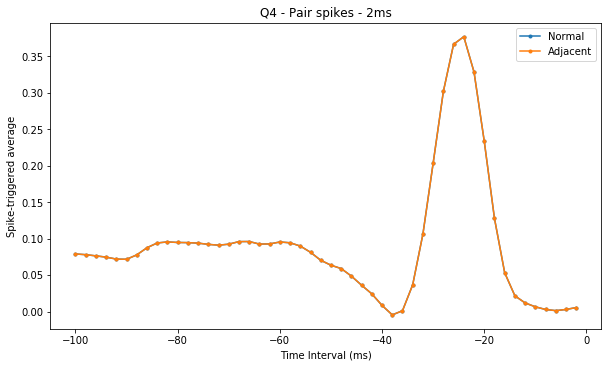

In [199]:
stas_pair = calculate_pair_stas(spikes, stimuli, 2)
stas_pair_adj = calculate_pair_stas_adj(spikes, stimuli, 2)
plot_spike_triggered_avg(stas_pair, stas_pair_adj, "Q4 - Pair spikes - 2ms", "spike-trig-avg-2ms.png")

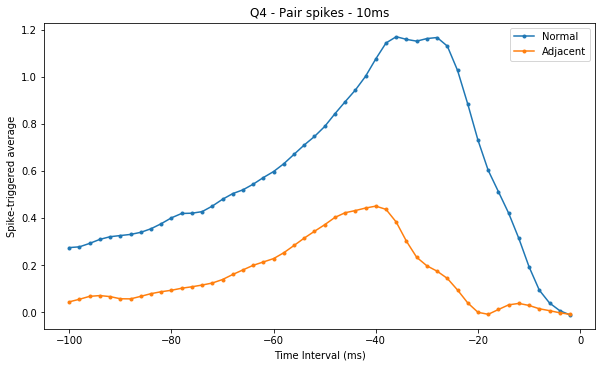

In [192]:
stas_pair = calculate_pair_stas(spikes, stimuli, 10)
stas_pair_adj = calculate_pair_stas_adj(spikes, stimuli, 10)
plot_spike_triggered_avg(stas_pair, stas_pair_adj, "Q4 - Pair spikes - 10ms", "spike-trig-avg-10ms.png")

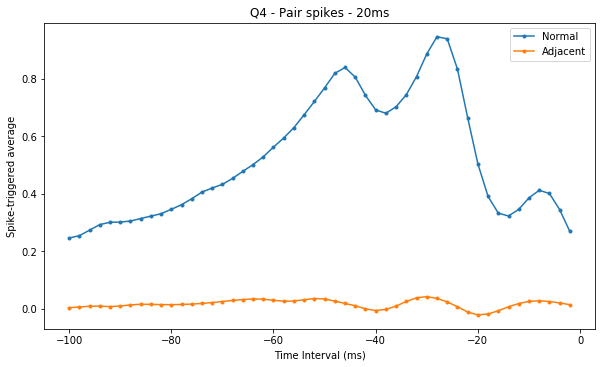

In [196]:
stas_pair = calculate_pair_stas(spikes, stimuli, 20)
stas_pair_adj = calculate_pair_stas_adj(spikes, stimuli, 20)
plot_spike_triggered_avg(stas_pair, stas_pair_adj, "Q4 - Pair spikes - 20ms", "spike-trig-avg-20ms.png")

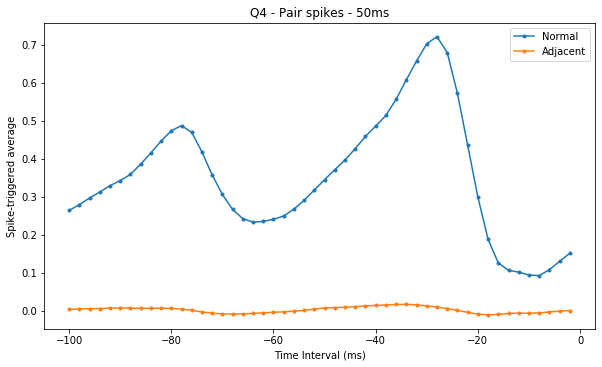

In [198]:
stas_pair = calculate_pair_stas(spikes, stimuli, 50)
stas_pair_adj = calculate_pair_stas_adj(spikes, stimuli, 50)
plot_spike_triggered_avg(stas_pair, stas_pair_adj, "Q4 - Pair spikes - 50ms", "spike-trig-avg-50ms.png")